In [23]:
# Import statements
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Initial constants
NUM_SAMPLES = 10000
GAUSSIAN_STD = 0.1
MIN_X_VALUE = 0.0
MAX_X_VALUE = 2 * math.pi
TRAIN_SIZE = 0.6
VAL_SIZE = 0.2
TEST_SIZE = 0.2
SEED = 1234

# Set seeds
np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
# Create x values and compute corresponding y values (pre-noising)
x_values = np.random.uniform(MIN_X_VALUE, MAX_X_VALUE, NUM_SAMPLES)
y_values_prenoise = np.sin(x_values)

# Create noise vector
noise_vector = np.random.normal(0, GAUSSIAN_STD, NUM_SAMPLES)

# Compute y values (post-noising)
y_values_postnoise = y_values_prenoise + noise_vector

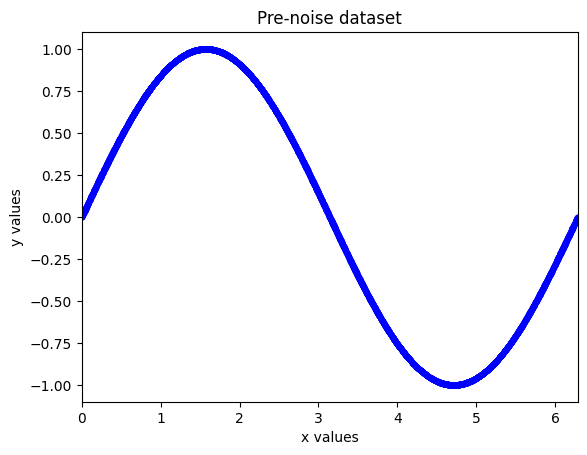

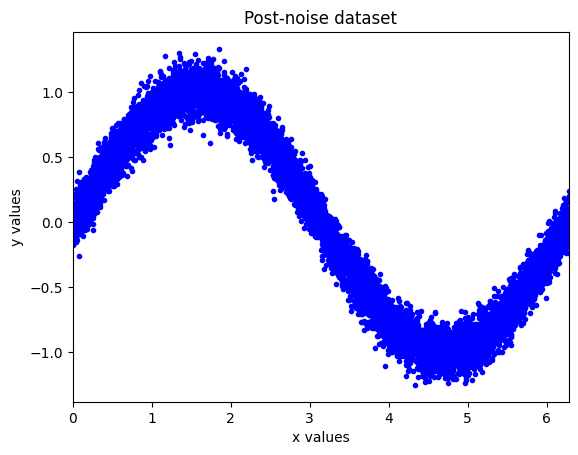

In [ ]:
# Plot pre-noise dataset
plt.plot(x_values, y_values_prenoise, 'b.')
plt.title('Pre-noise dataset')
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim(MIN_X_VALUE, MAX_X_VALUE)
plt.show()

# Plot post-noise dataset
plt.plot(x_values, y_values_postnoise, 'b.')
plt.title('Post-noise dataset')
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim(MIN_X_VALUE, MAX_X_VALUE)
plt.show()

In [ ]:
# Create train, val, test splits
train_x, test_x, train_y, test_y = train_test_split(x_values, y_values_postnoise, test_size=TEST_SIZE, random_state=SEED)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=VAL_SIZE, random_state=SEED)

# Convert np arrays into dataframes
train_df = pd.DataFrame({'x': train_x, 'y': train_y})
val_df = pd.DataFrame({'x': val_x, 'y': val_y})
test_df = pd.DataFrame({'x': test_x, 'y': test_y})

# Convert dfs to csv
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

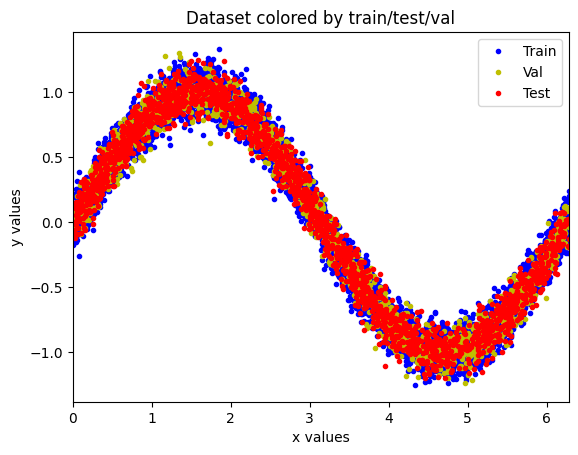

In [25]:
# Plot dataset colored by train/test/val
plt.plot(train_x, train_y, 'b.', label='Train')
plt.plot(val_x, val_y, 'y.', label='Val')
plt.plot(test_x, test_y, 'r.', label='Test')
plt.title('Dataset colored by train/test/val')
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim(MIN_X_VALUE, MAX_X_VALUE)
plt.legend()
plt.show()